In [ ]:
## Warning: If Shennong library gives an error, just run the cell again.

In [153]:

import torchaudio
import parselmouth
import librosa
from features import AudioSample
from pathlib import Path
import pandas as pd
from typing import List

import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, glob, time
import librosa
import librosa.display
import IPython
from tqdm import tqdm
from IPython.display import Audio
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') #matplot lib complains about librosa
import IPython.display as ipd
from surfboard.sound import Waveform
import numpy as np

In [154]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.dataset import Dataset
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [155]:
## Gathering the data

#for index_num, row in tqdm(metadata.iterrows()):
#    file_name = "01 AUDIOFILES PER USER/" + str(row["userid"]) + "/"+str(row["filename"])
#    # save score label
#    shutil.copy2(file_name, "\")

## Data Visualization

In [156]:
#Chose random vowel audio and answer audio
vowelpath = "20220130013601.wav"
answerpath = "20220130013629.wav"
vowel_audio, vowel_sr = librosa.load(vowelpath, res_type="kaiser_fast")
# extract the features
D_v = np.abs(librosa.stft(vowel_audio))
vowel_feature = librosa.feature.mfcc(y=vowel_audio, sr=vowel_sr, n_mfcc=128)

answer_audio, answer_sr = librosa.load(answerpath, res_type="kaiser_fast")
D_a = np.abs(librosa.stft(answer_audio))
# extract the features
answer_feature = librosa.feature.mfcc(y=answer_audio, sr=answer_sr, n_mfcc=128)

<function matplotlib.pyplot.show(close=None, block=None)>

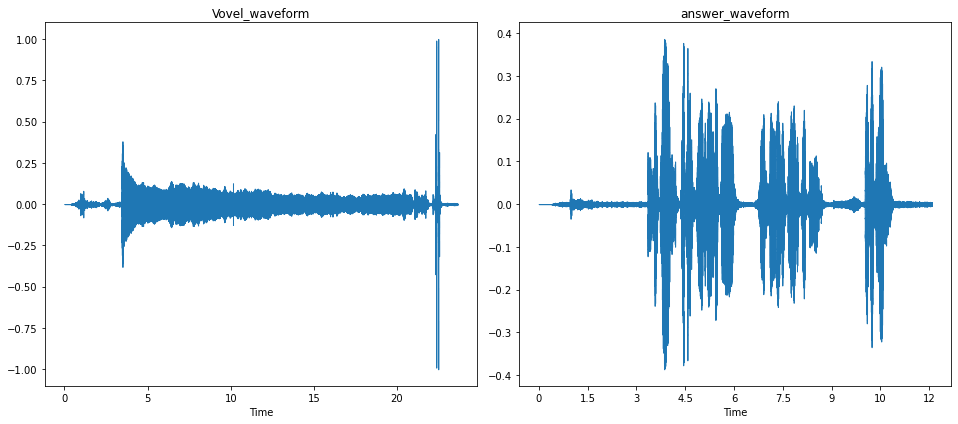

In [157]:
𝚙𝚕𝚝.𝚏𝚒𝚐𝚞𝚛𝚎(𝚏𝚒𝚐𝚜𝚒𝚣𝚎 = (20,6))
#Linear Power Spectrogram
𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(1,3,1)
librosa.display.waveshow(vowel_audio, sr=vowel_sr)
plt.tight_layout()
plt.title("Vovel_waveform")

𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(1,3,2)
librosa.display.waveshow(answer_audio, sr=answer_sr)
plt.tight_layout()
plt.title("answer_waveform")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

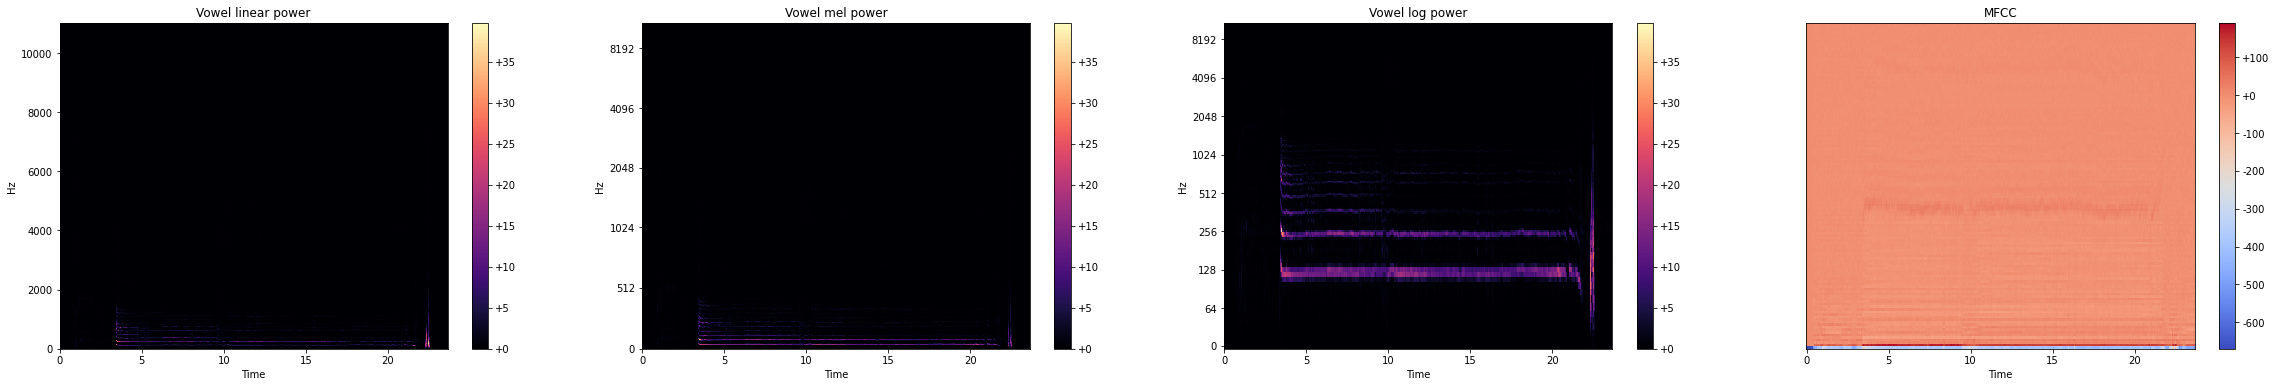

In [158]:
𝚙𝚕𝚝.𝚏𝚒𝚐𝚞𝚛𝚎(𝚏𝚒𝚐𝚜𝚒𝚣𝚎 = (40,6))
#Linear Power Spectrogram
𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(1,4,4)
librosa.display.specshow(vowel_feature, x_axis="time")
plt.colorbar(format="%+2.0f")
plt.title("MFCC")
𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(1,4,1)
librosa.display.specshow(D_v, y_axis="linear",x_axis="time")
plt.colorbar(format="%+2.0f")

plt.title("Vowel linear power")
#Log Power Spectrogram
𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(1,4,3)
librosa.display.specshow(D_v, y_axis="log",x_axis="time") 
plt.colorbar(format="%+2.0f")
plt.title("Vowel log power")
#Mel Power Spectrogram
𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(1,4,2)
librosa.display.specshow(D_v, y_axis="mel",x_axis="time")
plt.colorbar(format="%+2.0f")

plt.title("Vowel mel power")

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

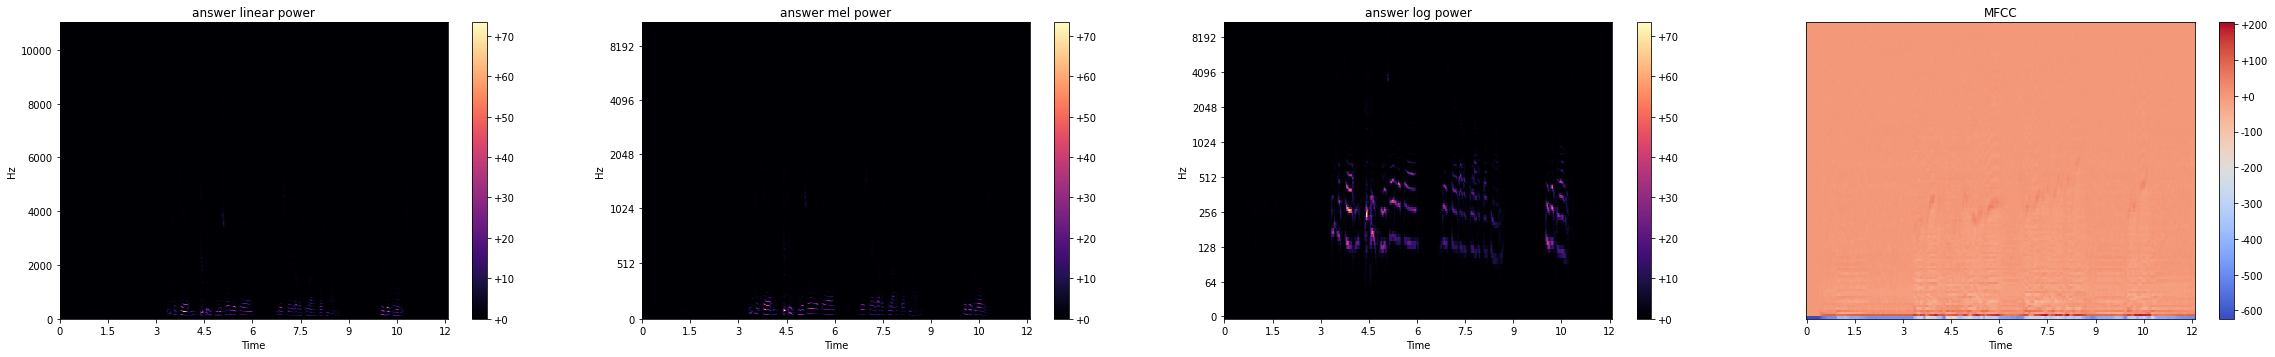

In [159]:
𝚙𝚕𝚝.𝚏𝚒𝚐𝚞𝚛𝚎(𝚏𝚒𝚐𝚜𝚒𝚣𝚎 = (40,12))

#Linear Power Spectrogram
𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(2,4,4)
librosa.display.specshow(answer_feature, x_axis="time")
plt.colorbar(format="%+2.0f")
plt.title("MFCC")

𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(2,4,1)
librosa.display.specshow(D_a, y_axis="linear",x_axis="time")
plt.colorbar(format="%+2.0f")
plt.title("answer linear power")
#Log Power Spectrogram
𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(2,4,3)
librosa.display.specshow(D_a, y_axis="log",x_axis="time") 
plt.colorbar(format="%+2.0f")
plt.title("answer log power")
#Mel Power Spectrogram
𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(2,4,2)
librosa.display.specshow(D_a, y_axis="mel",x_axis="time")
plt.colorbar(format="%+2.0f")

plt.title("answer mel power")




plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

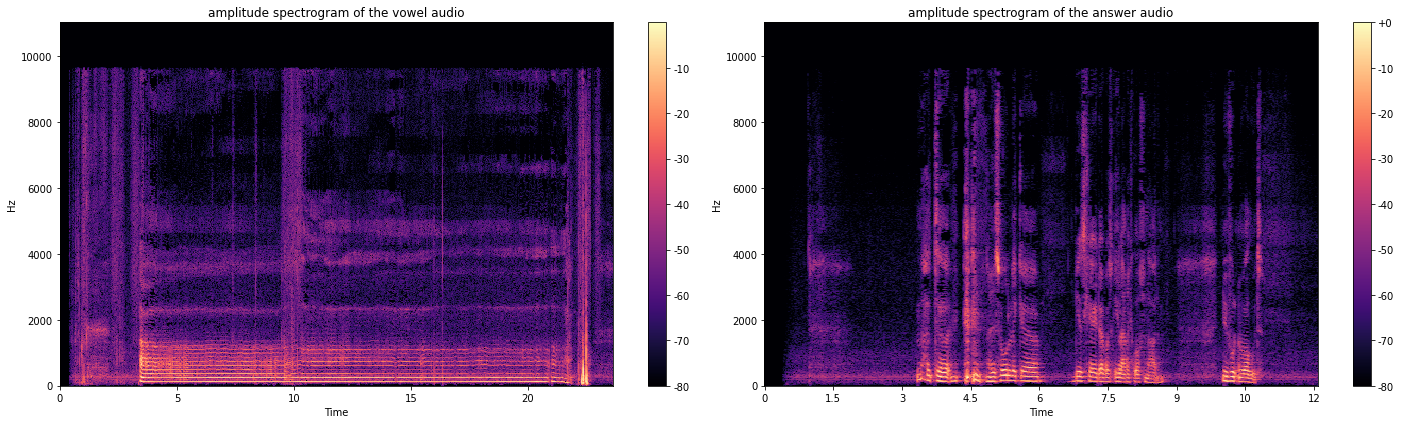

In [160]:
𝚙𝚕𝚝.𝚏𝚒𝚐𝚞𝚛𝚎(𝚏𝚒𝚐𝚜𝚒𝚣𝚎 = (40,6))
#Linear Power Spectrogram

𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(1,4,1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_v),ref=np.max), y_axis='linear', x_axis='time')

plt.tight_layout()
plt.title("amplitude spectrogram of the vowel audio")

plt.colorbar(format="%+2.0f")
𝚙𝚕𝚝.𝚜𝚞𝚋𝚙𝚕𝚘𝚝(1,4,2)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D_a),ref=np.max), y_axis='linear', x_axis='time')

plt.tight_layout()
plt.title("amplitude spectrogram of the answer audio")

plt.colorbar(format="%+2.0f")
plt.show

## Feature Computing

Here, we will compute some necessary features: maximum_phonation_time, maximum_phonation_time_until_voice_break, fraction_of_locally_unvoiced_frames, number_of_voice_breaks, degree_of_voice_breaks


In [161]:

sample_rate=22050

metadata=pd.read_csv("modified_data.csv")
vowel_audio_samples: List[AudioSample] = []
answer_audio_samples: List[AudioSample] = []
for index_num, row in tqdm(metadata.iterrows()):

    file_name = str(row["filename"])

    vowel_audio_array, rate = librosa.core.load(file_name, sr=None)
    vowel_audio_samples.append(AudioSample(data=vowel_audio_array,
                                     rate=rate,
                                     name=str(row["filename"])))


314it [00:16, 18.93it/s]


In [162]:
from collections import defaultdict
from features import *
import tqdm
features_dict: Dict[str, SampleProcessor] = {
    "Maximum_phonation_time": MPT(),
    'Maximum_phonation_time_until_voice_break': MaximumPhonationUntilVoiceBreak(),
    'Aperiodicity_Features': AperiodicityFeatures(),
}




def extract(samples_list: List[AudioSample],
          features: Dict[str, SampleProcessor],
          fail_on_error: bool = True):
    """This function takes care of running the extraction,
    and stores the extracted features for each sample in a neat
    little dictionnary"""
    extracted_features = defaultdict(dict)
    for feature_name, processor in features.items():
        for audio_sample in tqdm.tqdm(samples_list):
            try:
                proc_output = processor(audio_sample)
            except Exception as e:
                if fail_on_error:
                    raise e
                else:
                    print(f"Got error on sample '{audio_sample.name}':' "
                          f"{type(e).__name__} :{str(e)}', skipping.")
            else:
                extracted_features[audio_sample.name][feature_name] = proc_output

    return extracted_features



## Feature Extraction

Here, a helper function that runs the extraction using the samples
and the selected feature extractors will be defined. Then, we'll run that function on our audio samples dataset.

Mfc coefficients will be used as a feature vector. To analyze the audio better, airflow insufficiency, aperiodicity, irregular vibration of vocal folds, signal perturbation, increased noise features will be extracted and will be added to the feature vector for this task.

This feature selection method is inspired by the papers ['Vocal markers from sustained phonation in Huntington’s Disease'](https://arxiv.org/abs/2006.05365) and ['Phonatory Dysfunction as a Preclinical Symptom of Huntington Disease'](https://www.researchgate.net/publication/268791311_Phonatory_Dysfunction_as_a_Preclinical_Symptom_of_Huntington_Disease). 

In this work, vocal tremor and recurrence period density entropy will not be computed as they tend to return NaN values and are slower to compute.
We will also cut of the first 0.5 second of the audio as it provides no information.

Note: We will only use mfccs here for the features. If you want to use the others, configure the extract_features() function.

In [163]:
# then, we run the extraction.
# WARNING: this take (and should) way too much time when RPDE is included.
vowel_extracted_features = extract(vowel_audio_samples, features_dict, fail_on_error=False)


100%|█████████████████████████████████████████| 314/314 [00:24<00:00, 12.72it/s]


In [165]:
vowel_extracted_features

defaultdict(dict,
            {'20220130013601.wav': {'Maximum_phonation_time': 23.637913832199548,
              'Maximum_phonation_time_until_voice_break': 1.3000000000000003,
              'Aperiodicity_Features': {'Fraction of locally unvoiced frames': 23.305,
               'Number of voice breaks': 4.0,
               'Degree of voice breaks': 0.988}},
             '20220130013629.wav': {'Maximum_phonation_time': 12.07437641723356,
              'Maximum_phonation_time_until_voice_break': 0.3,
              'Aperiodicity_Features': {'Fraction of locally unvoiced frames': 61.379,
               'Number of voice breaks': 20.0,
               'Degree of voice breaks': 25.414}},
             '20220131204804.wav': {'Maximum_phonation_time': 19.4118820861678,
              'Maximum_phonation_time_until_voice_break': 7.800000000000002,
              'Aperiodicity_Features': {'Fraction of locally unvoiced frames': 16.409,
               'Number of voice breaks': 28.0,
               'Deg

In [278]:
def extract_features(x):
    sr=16000
    if isinstance(x, str):
        y, sr = librosa.load(x, sr=None)
        sound = Waveform(x, sample_rate=sr)
    else:
        y=x
    maximum_phonation_time=vowel_extracted_features[str(row["filename"])]["Maximum_phonation_time"]
    maximum_phonation_time_until_voice_break=vowel_extracted_features[str(row["filename"])]["Maximum_phonation_time_until_voice_break"]
    fraction_of_locally_unvoiced_frames=vowel_extracted_features[str(row["filename"])]["Aperiodicity_Features"]["Fraction of locally unvoiced frames"]
    number_of_voice_breaks=vowel_extracted_features[str(row["filename"])]['Aperiodicity_Features']["Number of voice breaks"]
    degree_of_voice_breaks=vowel_extracted_features[str(row["filename"])]['Aperiodicity_Features']["Degree of voice breaks"]


    shimmers = sound.shimmers()
    jitters = sound.jitters()
    hnr=sound.hnr()
    shimmer=shimmers["localShimmer"]
    jitter=jitters["localJitter"]
    f0=sound.f0_statistics()
    f0=f0["f0_std"]
    dfa=sound.dfa()    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)
    mfcc_delta = librosa.feature.delta(mfcc)

    mfcc = np.mean(mfcc, axis=1)
    mfcc_delta = np.mean(mfcc_delta, axis=1)
    
    feature = np.concatenate([mfcc, mfcc_delta], axis = 0)
    fea1=np.array([maximum_phonation_time, maximum_phonation_time_until_voice_break, fraction_of_locally_unvoiced_frames, number_of_voice_breaks, degree_of_voice_breaks,f0,dfa,hnr])
    #maximum_phonation_time, maximum_phonation_time_until_voice_break, fraction_of_locally_unvoiced_frames, number_of_voice_breaks, degree_of_voice_breaks,f0,dfa
    #,,hnr,shimmer,jitter
    features=np.concatenate((feature, fea1))

    return features

## Data Augmentation

In [279]:
def awgn_augmentation(waveform, multiples=2, bits=16, snr_min=15, snr_max=30): 
    
    # get length of waveform (should be 3*48k = 144k)
    wave_len = len(waveform)
    
    # Generate normally distributed (Gaussian) noises
    # one for each waveform and multiple (i.e. wave_len*multiples noises)
    noise = np.random.normal(size=(multiples, wave_len))
    
    # Normalize waveform and noise
    norm_constant = 2.0**(bits-1)
    norm_wave = waveform / norm_constant
    norm_noise = noise / norm_constant
    
    # Compute power of waveform and power of noise
    signal_power = np.sum(norm_wave ** 2) / wave_len
    noise_power = np.sum(norm_noise ** 2, axis=1) / wave_len
    
    # Choose random SNR in decibels in range [15,30]
    snr = np.random.randint(snr_min, snr_max)
    
    # Apply whitening transformation: make the Gaussian noise into Gaussian white noise
    # Compute the covariance matrix used to whiten each noise 
    # actual SNR = signal/noise (power)
    # actual noise power = 10**(-snr/10)
    covariance = np.sqrt((signal_power / noise_power) * 10 ** (- snr / 10))
    # Get covariance matrix with dim: (144000, 2) so we can transform 2 noises: dim (2, 144000)
    covariance = np.ones((wave_len, multiples)) * covariance

    # Since covariance and noise are arrays, * is the haddamard product 
    # Take Haddamard product of covariance and noise to generate white noise
    multiple_augmented_waveforms = waveform + covariance.T * noise
    multiple_augmented_waveforms=multiple_augmented_waveforms.astype('float32')
    return multiple_augmented_waveforms

In [280]:
def augment_waveforms(waveforms,  classes, multiples):
    features=[]
    # keep track of how many waveforms we've processed so we can add correct label in the same order
    classes_count = 0
    # keep track of how many augmented samples we've added
    added_count = 0
    # convert emotion array to list for more efficient appending
    classes = classes.tolist()

    for waveform in waveforms:

        # Generate 2 augmented multiples of the dataset, i.e. 1440 native + 1440*2 noisy = 4320 samples total
        augmented_waveforms = awgn_augmentation(waveform, multiples=multiples)

        # compute spectrogram for each of 2 augmented waveforms
        for augmented_waveform in augmented_waveforms:

            # Compute MFCCs over augmented waveforms
            augmented_mfcc = feature_mfcc(augmented_waveform, sample_rate=sample_rate)

            # append the augmented spectrogram to the rest of the native data
            features.append(augmented_mfcc)
            classes.append(classes[classes_count])

            # keep track of new augmented samples
            added_count += 1

            # check progress
            print('\r'+f'Processed {classes_count + 1}/{len(waveforms)} waveforms for {added_count}/{len(waveforms)*multiples} new augmented samples',end='')

        # keep track of the emotion labels to append in order
        classes_count += 1
        
        # store augmented waveforms to check their shape
        augmented_waveforms_temp.append(augmented_waveforms)
       
    return features, emotions

In [281]:

df = pd.read_csv('modified_data.csv')

In [282]:
class MyCustomDataset(Dataset):
    def __init__(self, answers, vowels, scores):
        self.answers = answers
        self.vowels = vowels
        self.scores = scores
        
    def __getitem__(self, index):
        a1 = self.answers[index]
        a2 = self.vowels[index]
        

        a1 = extract_features(a1)
        a2 = extract_features(a2)

        
        feature = np.concatenate([a1.reshape([1, a1.shape[0]]), a2.reshape([1, a1.shape[0]])], axis=0)
        # print(feature.shape)
        img = torch.tensor(feature, dtype=torch.float32)
        # img = img.reshape([img.shape[0], 1, img.shape[1]])
        # print(img.shape)
        
        
        
        def ordinal_labeler(score):
            levels = [1]*score + [0]*(39 - score)
            levels = torch.tensor(levels, dtype=torch.float32)
            return levels
        
        score = self.scores[index]
        label = np.array(ordinal_labeler(score))
        return img, label

    def __len__(self):
        count = len(self.vowels)
        return count

## Train Test Split

In [283]:
answers = list()
vowels = list()
scores = list()


double_scores = df['score'].tolist()
files = df['filename'].tolist()

i = 0
while i < len(files):
    answers.append(files[i+1])
    scores.append(double_scores[i])
    vowels.append(files[i])
    i += 2

In [284]:
indices = np.arange(len(answers))
np.random.shuffle(indices)

limit = int(len(indices)*0.75)
answers = np.array(answers)
scores = np.array(scores)
vowels = np.array(vowels)

X_train1, X_train2, X_test1, X_test2 = vowels[indices[:limit]], answers[indices[:limit]], vowels[indices[limit:]], answers[indices[limit:]]
y_train,  y_test = scores[indices[:limit]], scores[indices[limit:]] 

In [285]:
train_data = MyCustomDataset(X_train1, X_train2, y_train)

In [286]:
test_data = MyCustomDataset(X_test1, X_test2, y_test)

## Model Architecture

 We will use a Conv1 model for both inputs. Since this is an ordinal classification problem, we will have to label the input.

In [287]:
num_epochs = 200
num_classes = 40
batch_size = 16
learning_rate = 0.0001

from torch.utils.data import DataLoader

In [288]:
train_loader = DataLoader(dataset=train_data, batch_size=batch_size)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size)

In [295]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(2, 32, kernel_size=1, stride=1),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv1d(32, 64, kernel_size=1, stride=1),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Linear(2176, 512, bias=True),
            nn.ReLU())
        self.fc2 = nn.Linear(512, 39)
        self.last = nn.Sigmoid()
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape([out.size(0), -1])
        # print(out.shape)
        out = self.fc1(out)
        out = self.fc2(out)
        # print(out)
        out = self.last(out)
        # print(out)
        # print()
        return out

model = ConvNet()
model.to(device)

# Loss and optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [296]:
def ordinal_regression(predictions, targets):
    return nn.MSELoss(reduction='none')(predictions, targets).sum(axis=1)

In [297]:
warnings.filterwarnings('ignore')

In [298]:
def prediction2label(pred: np.ndarray, threshold: float):
    """Convert ordinal predictions to class labels, e.g.
    
    [0.9, 0.1, 0.1, 0.1] -> 0
    [0.9, 0.9, 0.1, 0.1] -> 1
    [0.9, 0.9, 0.9, 0.1] -> 2
    etc.
    """
    return (pred > threshold).cumprod(axis=1).sum(axis=1) - 1

In [299]:
total_step = len(train_loader)

for epoch in range(num_epochs):
    loss_list = []
    acc_list = []
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        #print(images)
        images = images
        labels = labels
        outputs = model(images)
        # print(outputs[0])
        loss = ordinal_regression(outputs, labels)
        loss_list.append(loss.mean().item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.mean().backward()
        optimizer.step()


        # Track the accuracy
        total = outputs.shape[0]
        predicted = prediction2label(outputs, 0.5)
        targets = prediction2label(labels, 0.5)
        correct = (predicted == targets).sum().item()
        acc_list.append(correct / total)

    print(f'epoch: {epoch}: acc: {np.mean(acc_list)}','loss: ',np.sum(loss_list))

epoch: 0: acc: 0.046875 loss:  64.3096776008606
epoch: 1: acc: 0.046875 loss:  34.98884296417236


KeyboardInterrupt: 

## Save and Load The Model

In [ ]:
torch.save(model, 'Conv1D_with_MFCC_Features_and_Some_Additional_Features.pt')

In [379]:

model_load = ConvNet()
#model.load_state_dict(torch.load(file))
model_load.load_state_dict(torch.load('Conv1D_with_MFCC_Features_and_Some_Additional_Features.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

In [382]:
def check_accuracy(test_loader: DataLoader, model: nn.Module):
    num_correct = 0
    total = 0
    model_load.eval()
    device="cpu"
    acc_list=[]
    with torch.no_grad():
        for data, labels in test_loader:
            data = data.to(device=device)
            labels = labels.to(device=device)
           
            predictions = model_load(data)
            
            total = labels.size(0)
            predicted = prediction2label(predictions, 0.5)
            targets = prediction2label(labels, 0.5)
            num_correct = (predicted == targets).sum().item()
            acc_list.append(num_correct / total)
        print(f"Test Accuracy of the model:{acc_list}")


In [383]:
check_accuracy(test_loader,model)

Test Accuracy of the model:0.25
